In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving archive.zip to archive.zip
User uploaded file "archive.zip" with length 1982599 bytes


In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: Twitter Sentiment Test.csv  
  inflating: Twitter Sentiment Train.csv  


In [ ]:
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', 200)

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import re
import string

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
train = pd.read_csv('Twitter Sentiment Train.csv')
test = pd.read_csv('Twitter Sentiment Test.csv')
print('Training dataset has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('Testing dataset has {} rows and {} columns'.format(test.shape[0], test.shape[1]))


Training dataset has 31962 rows and 3 columns
Testing dataset has 17197 rows and 2 columns


In [ ]:
train.tail(5)

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"
31961,31962,0,thank you @user for you follow


In [ ]:
train.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
train_length = train.tweet.str.len()
test_length = test.tweet.str.len()

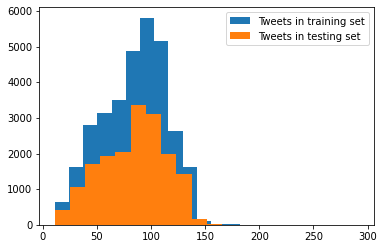

In [ ]:
plt.hist(train_length, bins=20, label='Tweets in training set')
plt.hist(test_length, bins=20, label='Tweets in testing set')
plt.legend()
plt.show()


In [ ]:
combined = train.append(test, ignore_index=True)
print('Combined data has {} rows and {} columns'.format(combined.shape[0], combined.shape[1]))

Combined data has 49159 rows and 3 columns


In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def clean_tweet(tweet):
  
  '''remove twitter handles, punctuation, 
  short words and stopwords'''
  clean_handle = re.sub(r'@[\w]*', '', tweet)                                   # Removes twitter handles from tweets
  clean_punc = re.sub(r'[^a-zA-Z#]', ' ', clean_handle)                          # Removes punctuation, special characters(except #tags) 
  clean_short_tokenized = [word for word in clean_punc.split() if len(word) > 3] # Remove short words and tokenize
  clean_normalize = [stemmer.stem(word) for word in clean_short_tokenized]       # Stem tokenized words
  return ' '.join(clean_normalize)

In [ ]:
combined.tweet.iloc[7]

"the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl"

In [ ]:
clean_tweet(combined.tweet.iloc[7])

'next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl'

In [ ]:
combined.tweet = combined.tweet.apply(lambda x : clean_tweet(x))

from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110, stopwords=STOPWORDS)

all_tweets = ' '.join(combined.tweet)
good_tweets = ' '.join(combined[combined.label == 0].tweet)
bad_tweets = ' '.join(combined[combined.label == 1].tweet)



In [ ]:
bad_tweets

'#cnn call #michigan middl school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin retweet agre lumpi say prove lumpi unbeliev that centuri need someth like thi again #neverump #xenophobia let fight against #love #peac white establish have folx run around love themselv promot great white peopl call peopl white #race #ident #med #altright use insecur lure into #whitesupremaci interest #linguist that doesn address #race racism about #power #raciolinguist bring mock obama be black #brexit #peopl aren protest #trump becaus #republican they becaus trump fuher when call #michelleobama gorilla becaus racist have long thought black peopl smaller hand show barri probabl lie about be #knick game suck more than #golf point finger million point right back #jewishsupremacist might libtard #libtard #sjw #liber #polit take #trash america vote against #hate vote against vote against hold open door woman becaus woman becaus nice thing that e

In [ ]:
good_tweets

'when father dysfunct selfish drag kid into dysfunct #run thank #lyft credit caus they offer wheelchair van #disapoint #getthank bihday your majesti #model love take with time factsguid societi #motiv huge fare talk befor they leav chao disput when they there #allshowandnogo camp tomorrow danni next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom here #ireland consum price index climb from previou #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love daddi today day #gettingf ouch junior angri #got #junior #yugyoem #omg thank have paner #thank #posit #friday smile around user #cooki make peopl know essenti oil made chemic #euro peopl blame conced goal rooney gave away free kick know bale them from there littl dude #badday #coneofsham #cat #piss #funni #laugh product happi #wine tool #week

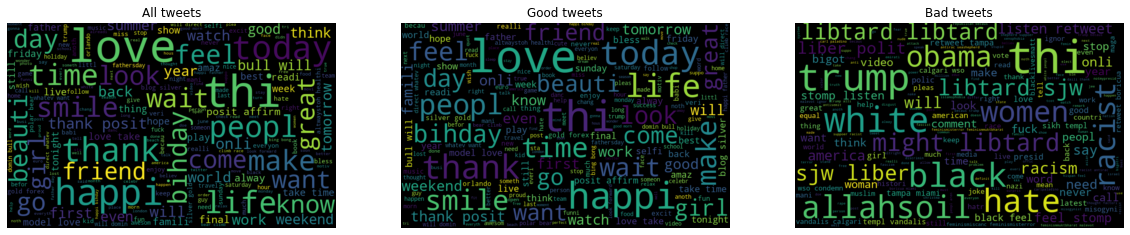

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(1,3,1)
plt.imshow(wordcloud.generate(all_tweets), interpolation='bilinear')
plt.axis('off')
plt.title('All tweets')
plt.subplot(1,3,2)
plt.imshow(wordcloud.generate(good_tweets), interpolation='bilinear')
plt.axis('off')
plt.title('Good tweets')
plt.subplot(1,3,3)
plt.imshow(wordcloud.generate(bad_tweets), interpolation='bilinear')
plt.axis('off')
plt.title('Bad tweets')
plt.show()



In [ ]:
def extract_hashtags(tweet):
  hashtag = re.findall(r'#(\w+)', tweet)
  return hashtag

In [ ]:
good_hashtags = extract_hashtags(good_tweets)
bad_hashtags = extract_hashtags(bad_tweets)


In [ ]:
from nltk import FreqDist
good = FreqDist(good_hashtags)
bad = FreqDist(bad_hashtags)

good_ht = pd.DataFrame({'Hashtag' : list(good.keys()) , 'Count' : list(good.values())}).sort_values('Count', ascending=False)
bad_ht = pd.DataFrame({'Hashtag' : list(bad.keys()) , 'Count' : list(bad.values())}).sort_values('Count', ascending=False)


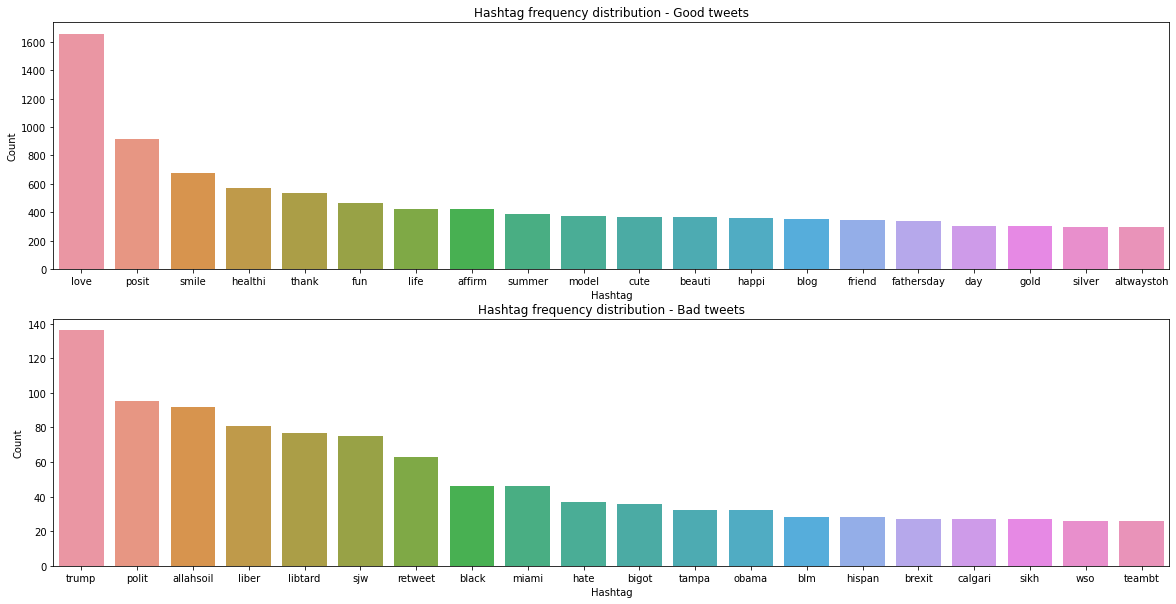

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.barplot(data=good_ht.iloc[:20], x='Hashtag', y='Count')
plt.title('Hashtag frequency distribution - Good tweets')
plt.subplot(2,1,2)
sns.barplot(data=bad_ht.iloc[:20], x='Hashtag', y='Count')
plt.title('Hashtag frequency distribution - Bad tweets')
plt.show()


In [ ]:
#create bow
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#  import gensim

#Bag of Words

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combined.tweet)
bow.shape



(49159, 1000)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_curve, auc

In [ ]:
train_bow = bow[:31962, :] # Training data had 31962 rows
test_bow = bow[31962:, :] # Testing data
x_bow_train, x_bow_test, y_bow_train, y_bow_test = train_test_split(train_bow, train.label, test_size=0.3, random_state=42)


In [ ]:
lr = LogisticRegression()
lr.fit(x_bow_train, y_bow_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
bow_pred_prob = lr.predict_proba(x_bow_test)
bow_pred_prob_fin = bow_pred_prob[:, 1] >= 0.3
bow_pred_prob_fin = bow_pred_prob_fin.astype(np.int)
print('Accuracy score : ',accuracy_score(y_bow_test, bow_pred_prob_fin))
print('F1 Score : ',f1_score(y_bow_test, bow_pred_prob_fin))

Accuracy score :  0.9413911773907603
F1 Score :  0.5308848080133557
